In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import seaborn as sns
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Library to split data 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
DM_dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
DM_dataset.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
DM_dataset.shape

(253680, 22)

In [5]:
DM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [71]:
DM_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [72]:
DM_dataset.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
DM_dataset.duplicated().sum()

23899

In [6]:
DM_dataset.drop_duplicates(inplace = True)

In [7]:
DM_dataset.duplicated().sum()

0

In [8]:
DM_dataset.shape

(229781, 22)

In [9]:
DM=DM_dataset.copy()

In [10]:
DM.shape

(229781, 22)

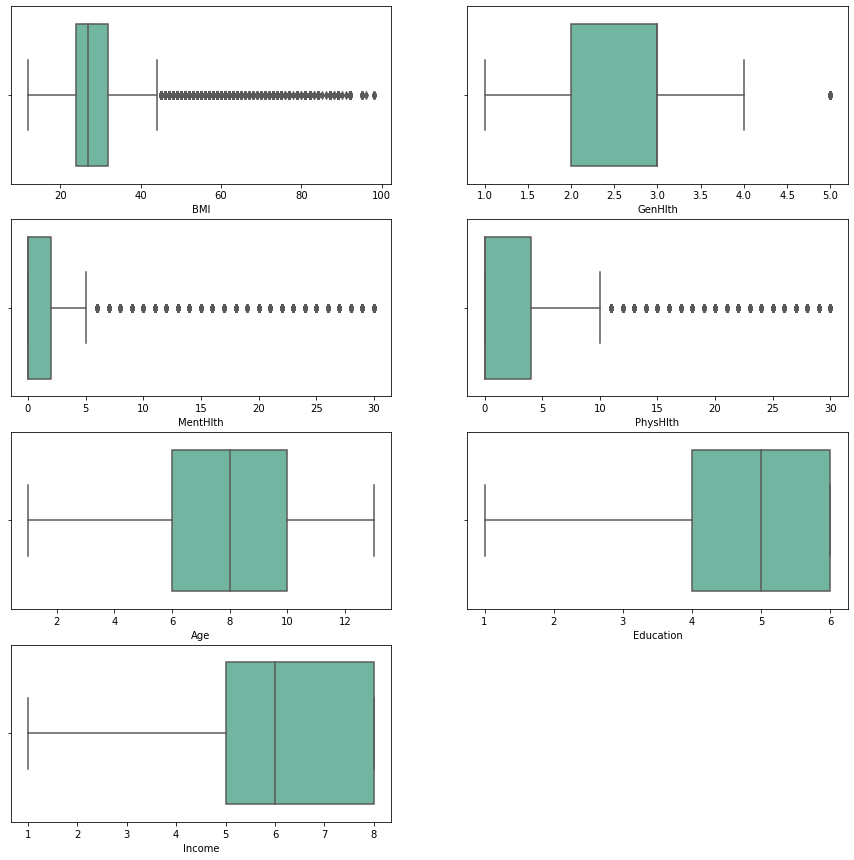

In [79]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = DM,palette='Set2')
plt.show()

<AxesSubplot:>

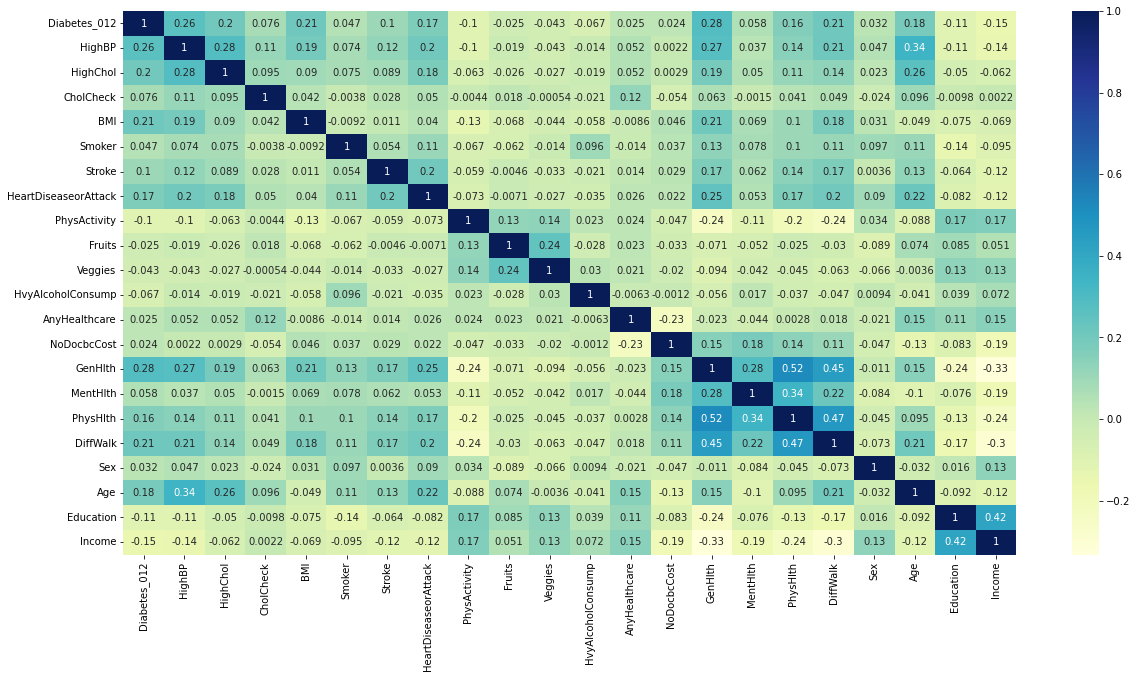

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(DM.corr(), annot=True, cmap="YlGnBu")



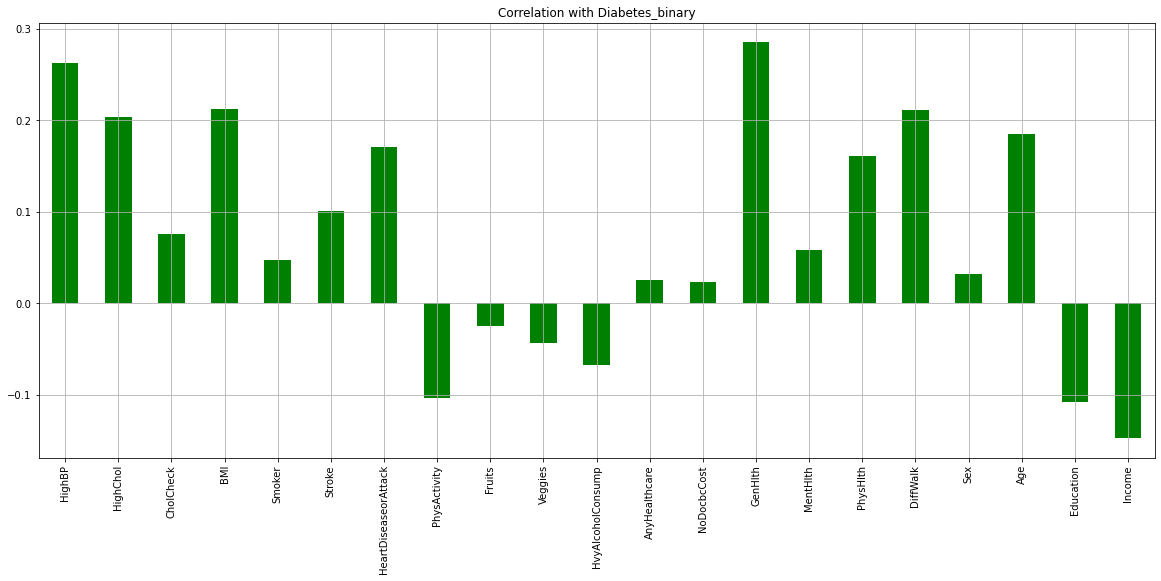

In [81]:
DM.drop('Diabetes_012', axis=1).corrwith(DM_dataset.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8),
                                                                               title="Correlation with Diabetes_binary",color="Green");

In [82]:
unique_values = {}
for col in DM.columns:
    unique_values[col] = DM[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [83]:
DM["Diabetes_012"]= DM["Diabetes_012"].replace({0:"NOn-Diabetic",1:"pre_Diabetic",2:"Diabetic"})

In [84]:
DM['Diabetes_012'].value_counts()

NOn-Diabetic    190055
Diabetic         35097
pre_Diabetic      4629
Name: Diabetes_012, dtype: int64

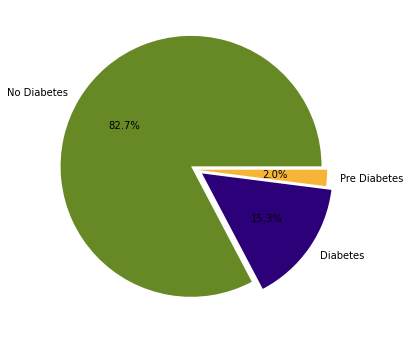

In [86]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [DM['Diabetes_012'].value_counts()[0], DM['Diabetes_012'].value_counts()[1], DM['Diabetes_012'].value_counts()[2]]
colors = ['#668926', '#2c0079', '#f7b538']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data =DM);

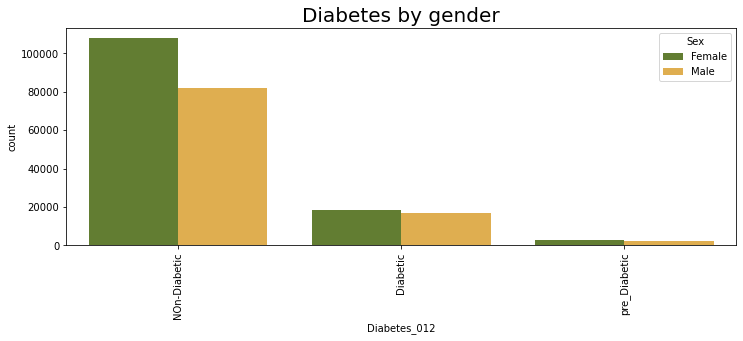

In [87]:
warnings.filterwarnings('ignore')
DM.Sex[DM['Sex'] == 0] = 'Female'
DM.Sex[DM['Sex'] == 1] = 'Male'

plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=DM,hue='Sex',palette= ["#668926","#f7b538"])
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})

plt.show()

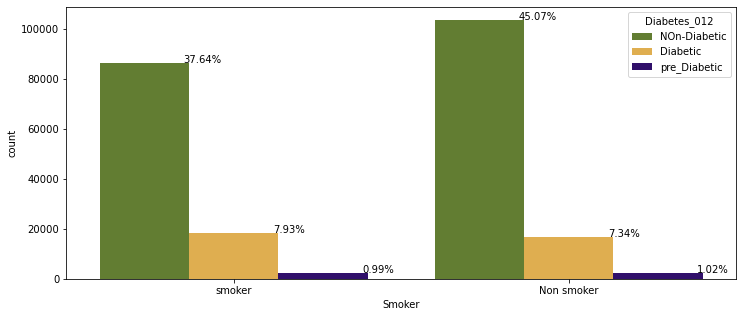

In [89]:
DM.Smoker[DM['Smoker'] == 0] = 'Non smoker'
DM.Smoker[DM['Smoker'] == 1] = 'smoker'

plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = DM,palette= ["#668926","#f7b538",'#2c0079'])
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/DM.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

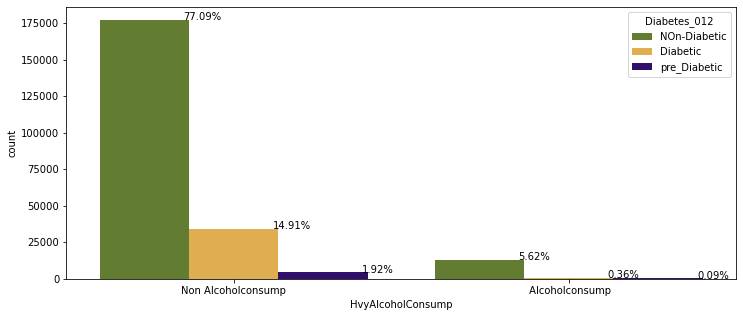

In [90]:
DM.HvyAlcoholConsump[DM['HvyAlcoholConsump'] == 0] = 'Non Alcoholconsump'
DM.HvyAlcoholConsump[DM['HvyAlcoholConsump'] == 1] = ' Alcoholconsump'
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = DM, palette= ["#668926","#f7b538",'#2c0079']);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/DM.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation b/w Smoker,HvyAlcoholConsump and Diabetes')

<Figure size 864x360 with 0 Axes>

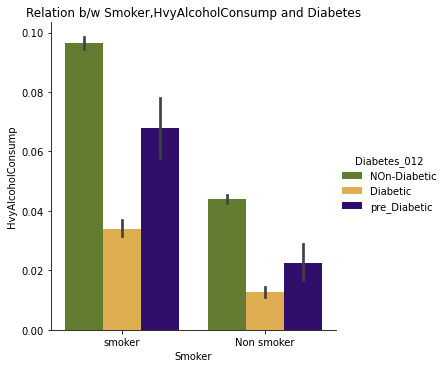

In [92]:
DM.HvyAlcoholConsump[DM['HvyAlcoholConsump'] ==  'Non Alcoholconsump'] = 0
DM.HvyAlcoholConsump[DM['HvyAlcoholConsump'] == ' Alcoholconsump'] =1

plt.figure(figsize=(12,5))
sns.catplot(x="Smoker", y="HvyAlcoholConsump", data = DM, hue="Diabetes_012", kind="bar",palette= ["#668926","#f7b538",'#2c0079']);  
plt.title("Relation b/w Smoker,HvyAlcoholConsump and Diabetes")

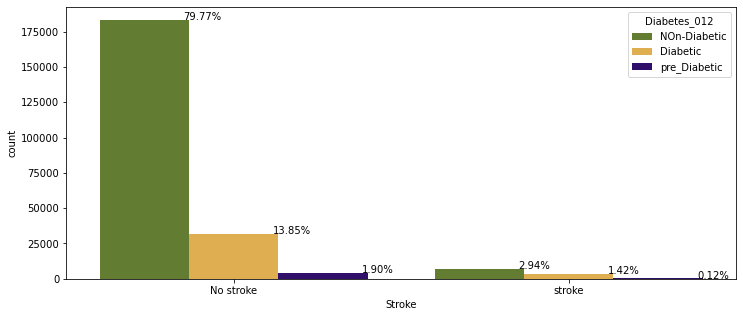

In [94]:
DM.Stroke[DM['Stroke'] == 0] = 'No stroke'
DM.Stroke[DM['Stroke'] == 1] = 'stroke'

plt.figure(figsize=(12,5))
x= sns.countplot(x='Stroke', hue='Diabetes_012' , data = DM,palette= ["#668926","#f7b538",'#2c0079']);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/DM.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


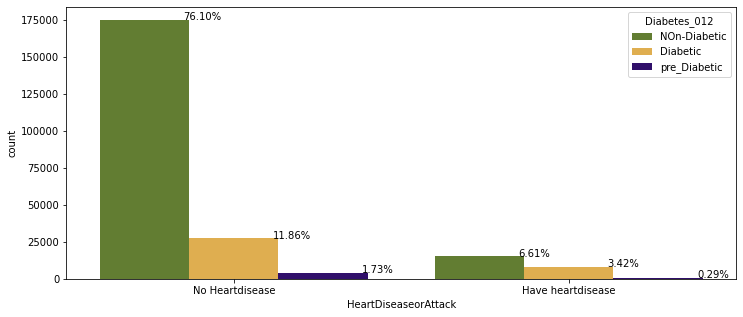

In [119]:
DM.HeartDiseaseorAttack[DM['HeartDiseaseorAttack'] == 0] = 'No Heartdisease'
DM.HeartDiseaseorAttack[DM['HeartDiseaseorAttack'] == 1] = 'Have heartdisease'

plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = DM, palette= ["#668926","#f7b538",'#2c0079']);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/DM.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

<Figure size 864x360 with 0 Axes>

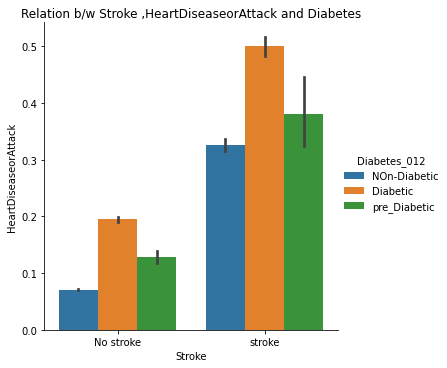

In [101]:
DM.HeartDiseaseorAttack[DM['HeartDiseaseorAttack'] == 'No Heartdisease'] = 0
DM.HeartDiseaseorAttack[DM['HeartDiseaseorAttack'] == 'Have heartdisease'] = 1

plt.figure(figsize=(12,5))

sns.catplot(x="Stroke", y ="HeartDiseaseorAttack", data = DM, hue="Diabetes_012", kind="bar");
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")


<AxesSubplot:xlabel='HighBP', ylabel='count'>

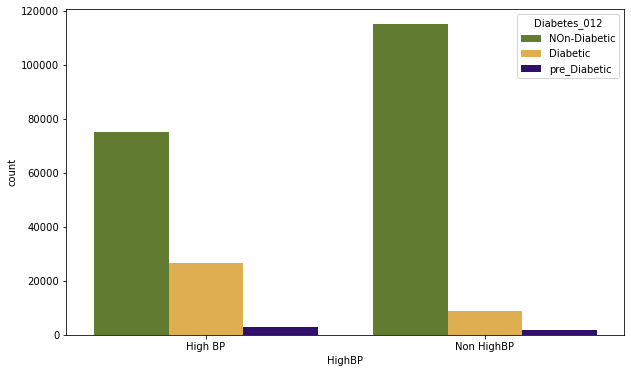

In [120]:
DM.HighBP[DM['HighBP'] == 0] = 'Non HighBP'
DM.HighBP[DM['HighBP'] == 1] = 'High BP'

plt.figure(figsize=(10,6))

sns.countplot(data=DM,x='HighBP',hue='Diabetes_012',palette= ["#668926","#f7b538",'#2c0079'])

<AxesSubplot:xlabel='HighChol', ylabel='count'>

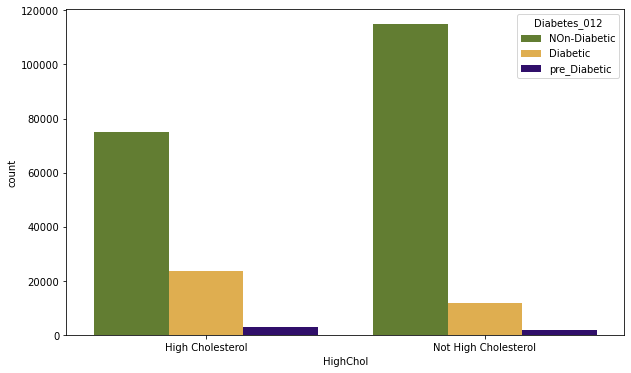

In [121]:
DM.HighChol[DM['HighChol'] == 0] = 'Not High Cholesterol'
DM.HighChol[DM['HighChol'] == 1] = 'High Cholesterol'


plt.figure(figsize=(10,6))
sns.countplot(data=DM,x='HighChol',hue='Diabetes_012',palette= ["#668926","#f7b538",'#2c0079'])

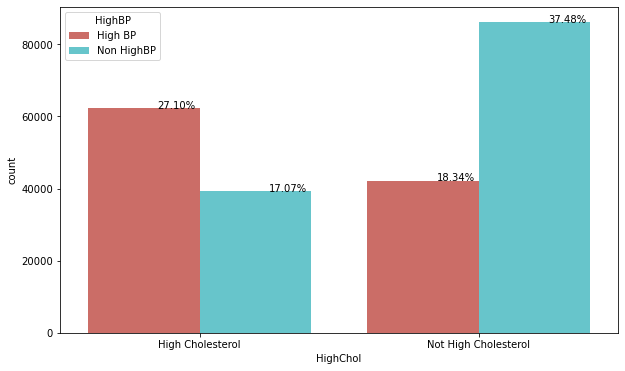

In [104]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=DM,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/DM.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

<Figure size 720x432 with 0 Axes>

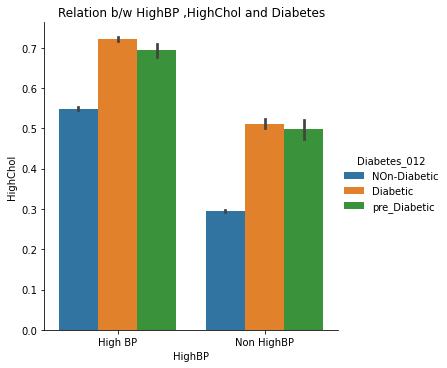

In [105]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  
DM.HighChol[DM['HighChol'] ==  'Not High Cholesterol'] = 0
DM.HighChol[DM['HighChol'] == 'High Cholesterol'] = 1

plt.figure(figsize=(10,6))

sns.catplot(x="HighBP" , y ="HighChol" , data =DM, hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

<Figure size 864x360 with 0 Axes>

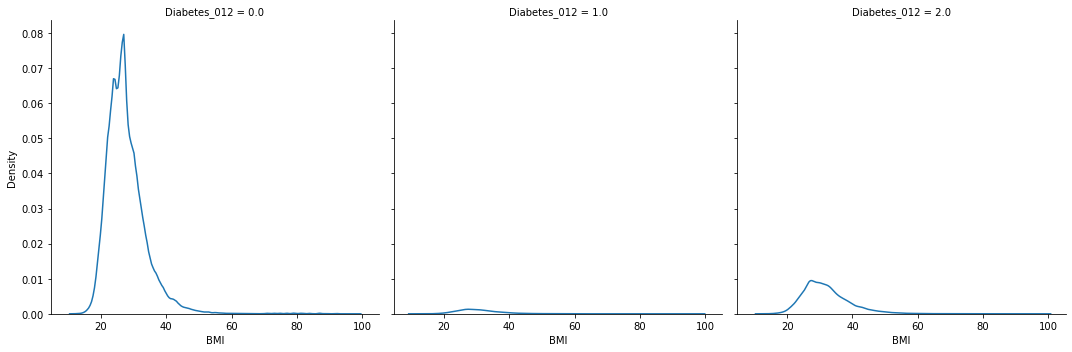

In [181]:
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes_012' , data = DM, kind="kde" ,palette="Set2");

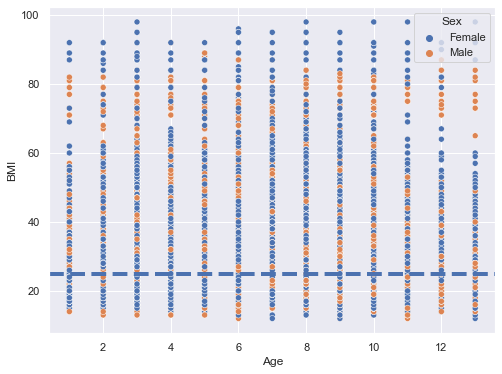

In [182]:
DM[DM['Sex'] == 0] = 'Female'
DM[DM['Sex'] == 1] = 'Male'

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=DM, x="Age", y="BMI", hue='Sex')
fig.axhline(y= 25, linewidth=4, color='b', linestyle= '--')
plt.show()

In [183]:
BMI=pd.cut(DM['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [184]:
cc=pd.crosstab(DM['Diabetes_012'],BMI,rownames=['Diabetes'])
cc=cc.astype(float)
cc

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetic,169.0,5350.0,11419.0,18118.0
NOn-Diabetic,2856.0,67462.0,68505.0,50998.0
pre_Diabetic,28.0,924.0,1631.0,2042.0


In [185]:
Diabetes_sum_lst=list(cc.transpose().sum().values)
Diabetes_sum_lst

[35056.0, 189821.0, 4625.0]

In [186]:
for idx in range(cc.values.shape[0]):
    cc.values[idx]= cc.values[idx]/Diabetes_sum_lst[idx]*100

cc

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetic,0.482086,15.261296,32.573597,51.683021
NOn-Diabetic,1.504575,35.539798,36.089263,26.866364
pre_Diabetic,0.605405,19.978378,35.264865,44.151351


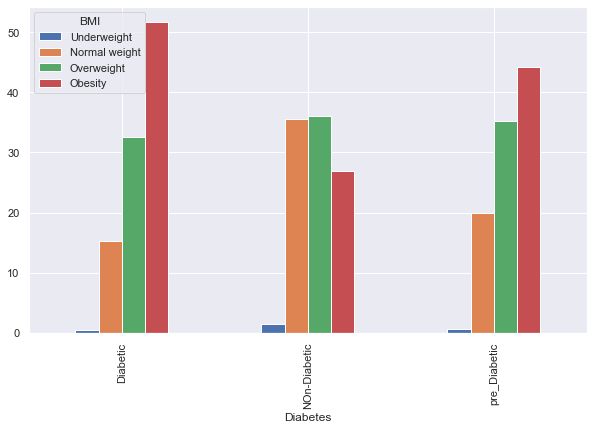

In [187]:
cc.plot(kind="bar",figsize=(10,6));
#for i in x.patches:
    #x.annotate('{:.2f}'.format(i.get_height()/cc.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
#plt.show()

<Figure size 864x360 with 0 Axes>

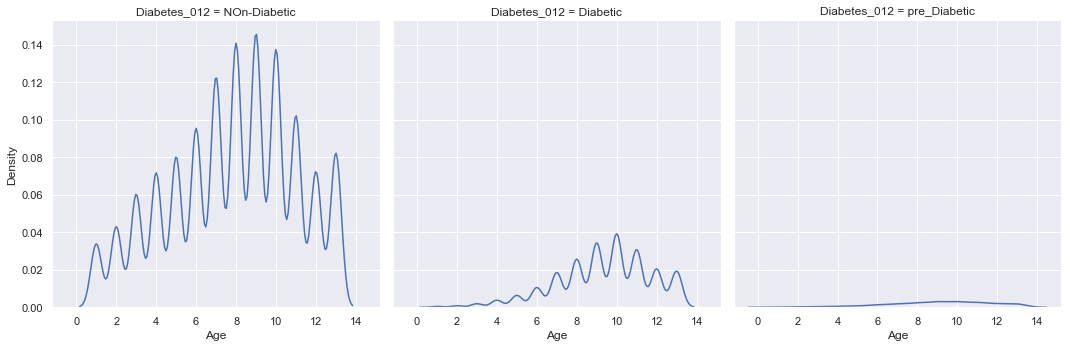

In [188]:
plt.figure(figsize=(12,5))
sns.displot(x='Age', col='Diabetes_012' , data = DM, kind="kde")
plt.show()

In [189]:
age = pd.cut(DM['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229781, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 720x432 with 0 Axes>

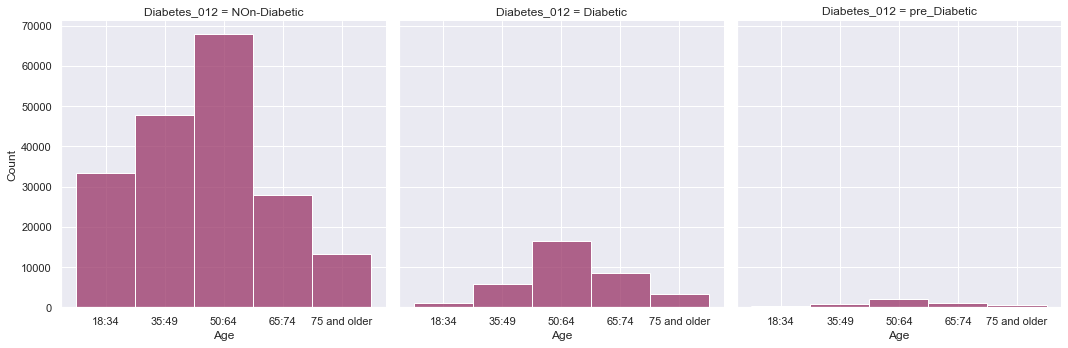

In [190]:
plt.figure(figsize=(10,6))
sns.displot(data=DM,col='Diabetes_012',x=age,color='#993366');

<Figure size 864x360 with 0 Axes>

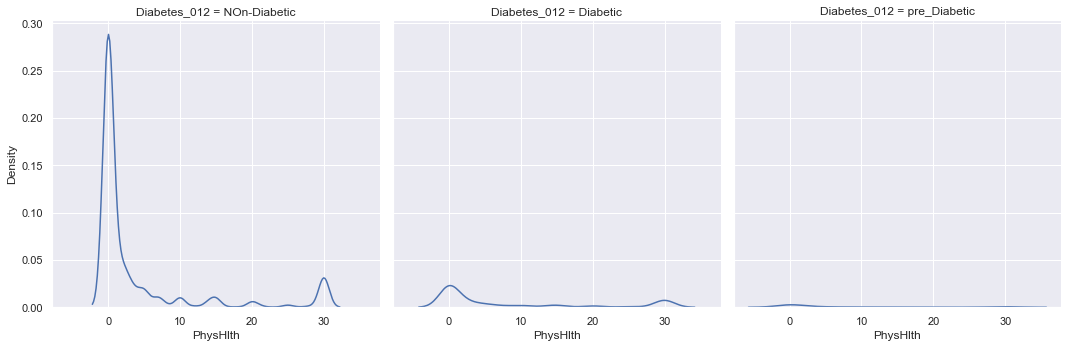

In [191]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = DM, kind="kde")
plt.show()

<Figure size 864x360 with 0 Axes>

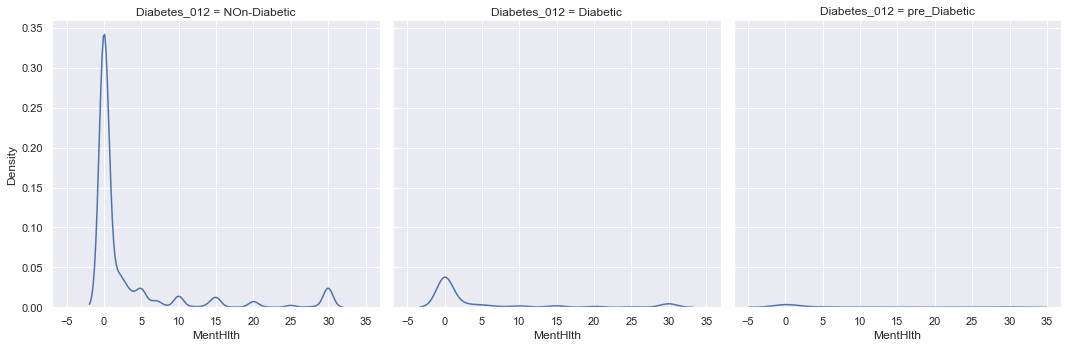

In [192]:
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = DM, kind="kde")
plt.show()


df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

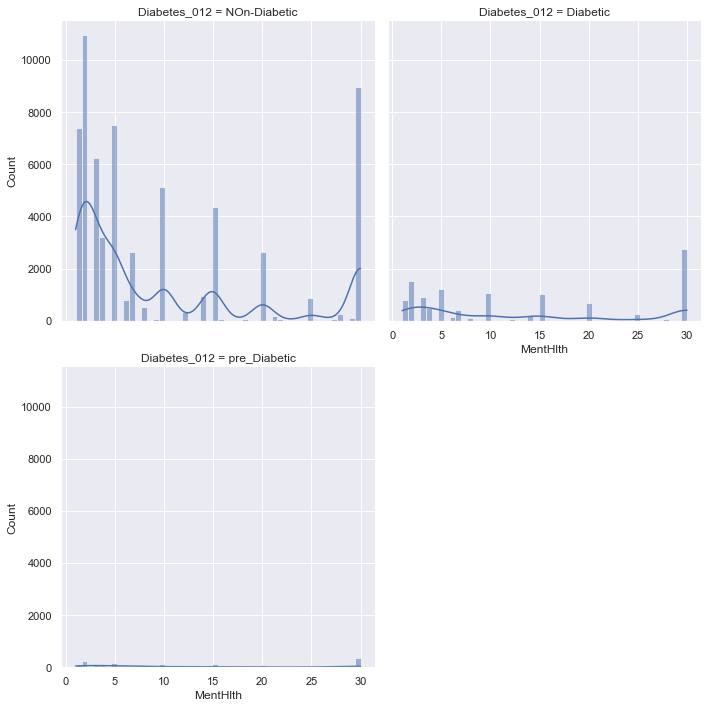

In [193]:
sns.displot(data=DM.loc[(DM_dataset['MentHlth']>0)&(DM_dataset['Diabetes_012']!="No Diabetes")],x='MentHlth'
            ,col='Diabetes_012',col_wrap=2,kde=True);

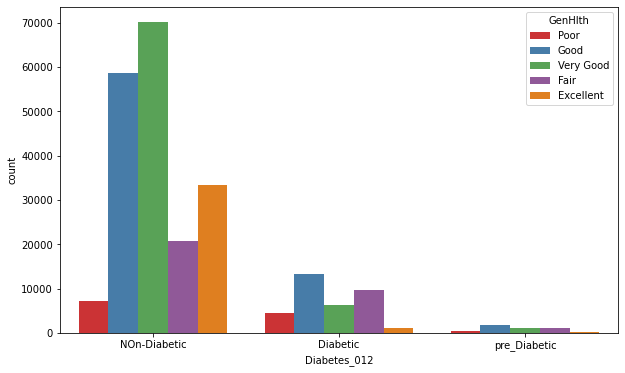

In [110]:
#DM_dataset.NoDocbcCost[DM_dataset['NoDocbcCost'] == 1] = 'Yes'
DM.GenHlth[DM['GenHlth'] == 1] = 'Excellent'
DM.GenHlth[DM['GenHlth'] == 2] = 'Very Good'
DM.GenHlth[DM['GenHlth'] == 3] = 'Good'
DM.GenHlth[DM['GenHlth'] == 4] = 'Fair'
DM.GenHlth[DM['GenHlth'] == 5] = 'Poor'

plt.figure(figsize=(10,6))
sns.countplot(data=DM,x='Diabetes_012',hue='GenHlth',palette='Set1');

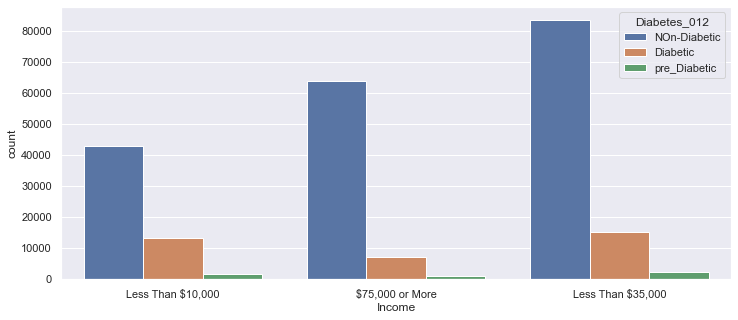

In [195]:
DM.Income[DM['Income'] == 1] = 'Less Than $10,000'
DM.Income[DM['Income'] == 2] = 'Less Than $10,000'
DM.Income[DM['Income'] == 3] = 'Less Than $10,000'
DM.Income[DM['Income'] == 4] = 'Less Than $10,000'
DM.Income[DM['Income'] == 5] = 'Less Than $35,000'
DM.Income[DM['Income'] == 6] = 'Less Than $35,000'
DM.Income[DM['Income'] == 7] = 'Less Than $35,000'
DM.Income[DM['Income'] == 8] = '$75,000 or More'

plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = DM)
plt.show()

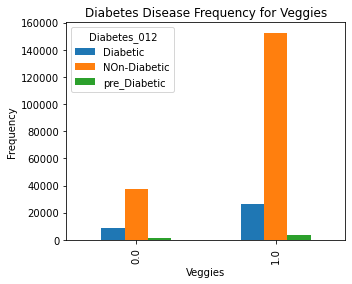

In [123]:
DM.DiffWalk[DM['Veggies'] == 0] = 'No veggies'
DM.DiffWalk[DM['Veggies'] == 1] = 'having veggies'
pd.crosstab(DM.Veggies,DM.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

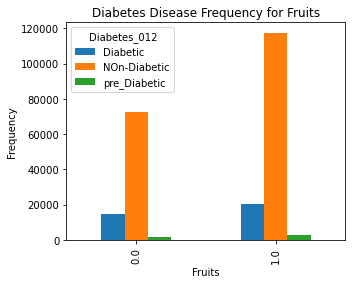

In [107]:
pd.crosstab(DM.Fruits,DM.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

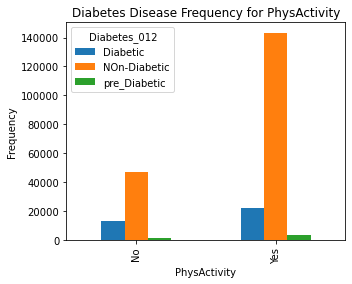

In [108]:
DM.PhysActivity[DM['PhysActivity'] == 0] = 'No'
DM.PhysActivity[DM['PhysActivity'] == 1] = 'Yes'

pd.crosstab(DM.PhysActivity,DM.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

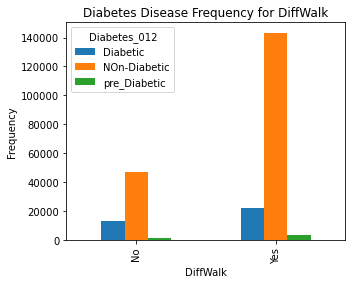

In [124]:
DM.PhysActivity[DM['DiffWalk'] == 0] = 'No'
DM.PhysActivity[DM['DiffWalk'] == 1] = 'Yes'

pd.crosstab(DM.PhysActivity,DM.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for DiffWalk')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

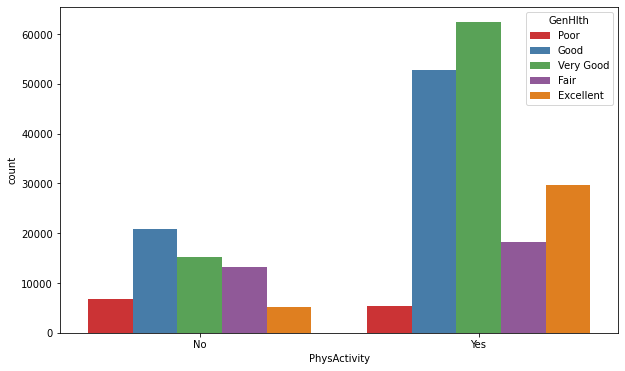

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(data=DM,x='PhysActivity',hue='GenHlth',palette='Set1');

<Figure size 1008x432 with 0 Axes>

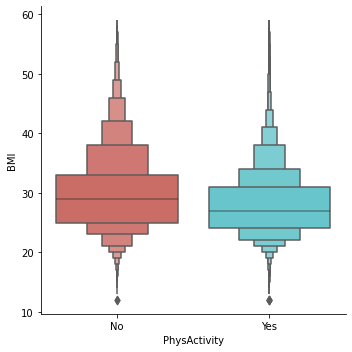

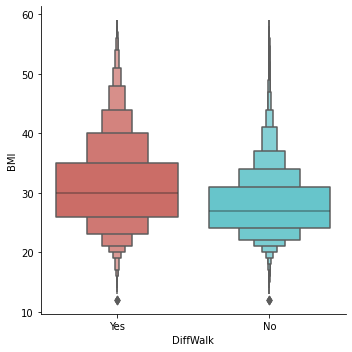

In [28]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=DM[DM['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=DM[DM['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

In [160]:
DM.copy=DM_dataset.copy()

In [161]:
DM.copy['Diabetes_012'].value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [162]:
y = DM.copy['Diabetes_012']
x = DM.copy.drop(['Diabetes_012'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.30 , random_state=42)

In [163]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [164]:
lg = LogisticRegression()
lg.fit(X_res, y_res)

LogisticRegression()

In [165]:
print(lg.score(X_res, y_res))
print(lg.score(x_test, y_test))

0.5098378584472137
0.6000725320954522


In [166]:
y_pred_train_lg = lg.predict(X_res)
acc_train_lg = accuracy_score(y_res, y_pred_train_lg)

y_pred_test_lg = lg.predict(x_test)
acc_test_lg = accuracy_score(y_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

0.5098378584472137
0.6000725320954522


In [167]:
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     57167
         1.0       0.03      0.30      0.06      1377
         2.0       0.33      0.57      0.42     10391

    accuracy                           0.60     68935
   macro avg       0.43      0.50      0.40     68935
weighted avg       0.83      0.60      0.68     68935



In [168]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_lg,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_lg,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_lg,average="micro"))

Precision: 0.600
Recall: 0.600
F-measure: 0.600


In [169]:
y_pred_prob_lg = lg.predict_proba(x_test)
roc_auc_score_lg= roc_auc_score(y_test, y_pred_prob_lg, multi_class="ovr")

print('ROC AUC Score: ',roc_auc_score_lg)

ROC AUC Score:  0.7349224573388988


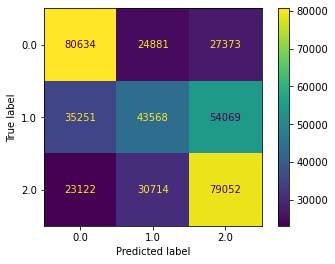

In [170]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(lg,X_res, y_res)
plt.show(pl)

In [171]:
### 2) Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth=16,max_features=10)
rf.fit(X_res, y_res)


RandomForestClassifier(max_depth=16, max_features=10)

In [172]:
print(rf.score(X_res, y_res))
print(rf.score(x_test, y_test))

0.8779924949330765
0.8116631609487198


In [173]:
y_pred_train_rf = rf.predict(X_res)
acc_train_rf = accuracy_score(y_res, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.8779924949330765
0.8116631609487198


In [174]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     57167
         1.0       0.02      0.00      0.00      1377
         2.0       0.43      0.40      0.41     10391

    accuracy                           0.81     68935
   macro avg       0.44      0.44      0.44     68935
weighted avg       0.79      0.81      0.80     68935



In [175]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_rf,average="micro"))

Precision: 0.812
Recall: 0.812
F-measure: 0.812


In [176]:
y_pred_prob_rf = rf.predict_proba(x_test)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rf)

ROC AUC Score: 0.746161571360833


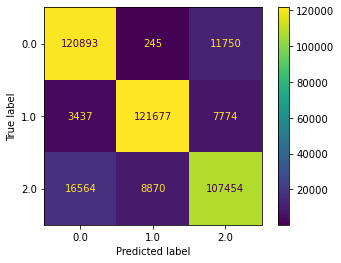

In [177]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(rf,X_res, y_res)
plt.show(pl)

xgbclassifier

In [178]:
xgb= XGBClassifier(max_depth=10)
xgb.fit(X_res, y_res)


[19:19:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [179]:
print(xgb.score(X_res, y_res))
print(xgb.score(x_test, y_test))

0.9473566712820821
0.8277942989772975


In [180]:
y_pred_train_xgb = xgb.predict(X_res)
acc_train_xgb = accuracy_score(y_res, y_pred_train_xgb)


y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

0.9473566712820821
0.8277942989772975


In [181]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90     57167
         1.0       0.08      0.00      0.00      1377
         2.0       0.47      0.22      0.30     10391

    accuracy                           0.83     68935
   macro avg       0.47      0.39      0.40     68935
weighted avg       0.78      0.83      0.80     68935



In [182]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_xgb,average="micro"))

Precision: 0.828
Recall: 0.828
F-measure: 0.828


In [183]:
y_pred_prob_xgb = xgb.predict_proba(x_test)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_xgb)

ROC AUC Score: 0.7240162726554044


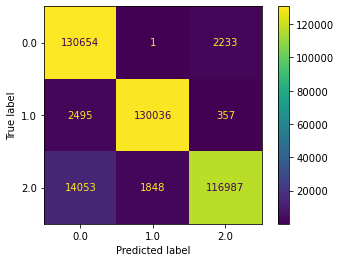

In [184]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(xgb,X_res, y_res)
plt.show(pl)

4. Decision Tree

In [185]:
dt= DecisionTreeClassifier(max_features=10 , max_depth=16)
dt.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=16, max_features=10)

In [186]:
print(dt.score(X_res, y_res))
print(dt.score(x_test, y_test))

0.796876567736239
0.7827953869587292


In [187]:
y_pred_train_dt = dt.predict(X_res)
acc_train_dt = accuracy_score(y_res, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.796876567736239
0.7827953869587292


In [188]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     57167
         1.0       0.03      0.03      0.03      1377
         2.0       0.38      0.40      0.39     10391

    accuracy                           0.78     68935
   macro avg       0.43      0.43      0.43     68935
weighted avg       0.79      0.78      0.78     68935



In [189]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_dt,average="micro"))

Precision: 0.783
Recall: 0.783
F-measure: 0.783


In [190]:
y_pred_prob_dt = dt.predict_proba(x_test)
roc_auc_score_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_dt)

ROC AUC Score: 0.7094927677853584


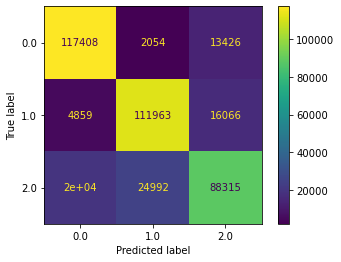

In [191]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(dt,X_res, y_res)
plt.show(pl)

In [210]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=6)

In [211]:
print(knn.score(X_res, y_res))
print(knn.score(x_test, y_test))

0.8998354504043505
0.6210778269384203


In [212]:
y_pred_train_knn = knn.predict(X_res)
acc_train_knn = accuracy_score(y_res, y_pred_train_knn)

y_pred_test_knn = knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

0.8998354504043505
0.6210778269384203


In [206]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.91      0.60      0.73     57167
         1.0       0.02      0.18      0.04      1377
         2.0       0.27      0.53      0.36     10391

    accuracy                           0.58     68935
   macro avg       0.40      0.44      0.37     68935
weighted avg       0.80      0.58      0.66     68935



In [196]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_knn,average="micro"))

Precision: 0.621
Recall: 0.621
F-measure: 0.621


In [198]:
y_pred_prob_knn = knn.predict_proba(x_test)
roc_auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_knn)

ROC AUC Score: 0.6278738426008207


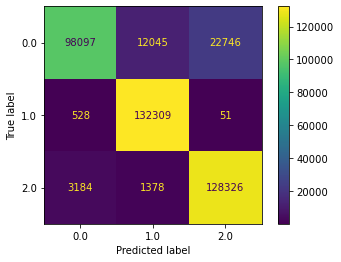

In [199]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(knn,X_res, y_res)
plt.show(pl)

Compare between algorithms

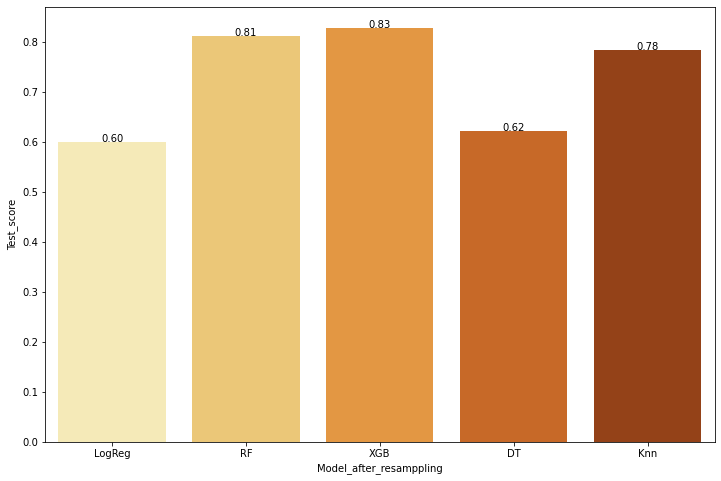

In [200]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['LogReg','RF','XGB','DT','Knn'],
        'Test_score': [accuracy_score(y_test, y_pred_test_lg),
                       accuracy_score(y_test, y_pred_test_rf),
                       accuracy_score(y_test, y_pred_test_xgb),
                       accuracy_score(y_test, y_pred_test_knn),
                      accuracy_score(y_test, y_pred_test_dt)],
        
        'ROC_AUC_Score': [roc_auc_score_lg,
                          roc_auc_score_rf, 
                          roc_auc_score_xgb,
                          roc_auc_score_knn,
                         roc_auc_score_dt]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [201]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Test_score,ROC_AUC_Score
1,RF,0.811663,0.746162
0,LogReg,0.600073,0.734922
2,XGB,0.827794,0.724016
4,Knn,0.782795,0.709493
3,DT,0.621078,0.627874


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [64]:
X = DM_dataset.iloc[:,1:]
Y = DM_dataset.iloc[:,0]

In [66]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(229781, 10)


In [67]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


In [65]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8633.562752
1,HighChol,5381.985473
2,CholCheck,54.155676
3,BMI,16667.006177
4,Smoker,268.924145
5,Stroke,2212.060848
6,HeartDiseaseorAttack,6015.661944
7,PhysActivity,656.187604
8,Fruits,57.666728
9,Veggies,89.554915


In [68]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  103705.813420
3                    BMI   16667.006177
14              MentHlth   13499.056578
18                   Age    9400.408945
0                 HighBP    8633.562752
16              DiffWalk    8310.280494
13               GenHlth    8142.602678
6   HeartDiseaseorAttack    6015.661944
1               HighChol    5381.985473
20                Income    3748.254712
5                 Stroke    2212.060848
10     HvyAlcoholConsump     973.676965
7           PhysActivity     656.187604
19             Education     537.068918
4                 Smoker     268.924145
12           NoDocbcCost     163.138397


In [ ]:
Fruits,Sex,CholCheck,AnyHealthcare,NoDocbcCost

In [70]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [72]:
DM_dataset.drop(colomns , axis= 1 ,inplace=True)

In [74]:
X=DM_dataset.drop("Diabetes_012",axis=1)
Y=DM_dataset["Diabetes_012"]

In [75]:
Y.value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [76]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [77]:
y_sm.shape , x_sm.shape

((13887,), (13887, 16))

In [90]:
y_sm.value_counts()

0.0    4629
1.0    4629
2.0    4629
Name: Diabetes_012, dtype: int64

In [91]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [93]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_re, Y_re = sm.fit_resample(X_train, Y_train)

In [121]:
lg1 = LogisticRegression(max_iter = 1500)
lg1.fit(X_re , Y_re)

LogisticRegression(max_iter=1500)

In [122]:
print(lg1.score(X_re, Y_re))
print(lg1.score(X_test, Y_test))

0.7100071552693448
0.7122630189584833


In [123]:
y_pred_train_lg1 = lg1.predict(X_re)
acc_train_lg1 = accuracy_score(Y_re, y_pred_train_lg1)

y_pred_test_lg1 = lg1.predict(X_test)
acc_test_lg1 = accuracy_score(Y_test, y_pred_test_lg1)
print(acc_train_lg1)
print(acc_test_lg1)

0.7100071552693448
0.7122630189584833


In [124]:
y_pred_prob_lg1 = lg1.predict_proba(X_test)
roc_auc_score_lg1 = roc_auc_score(Y_test, y_pred_prob_lg1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_lg1)

ROC AUC Score: 0.8609453357298636


In [125]:
print(classification_report(Y_test, y_pred_test_lg1))

              precision    recall  f1-score   support

         0.0       0.66      0.76      0.71      1389
         1.0       0.92      0.74      0.82      1410
         2.0       0.61      0.63      0.62      1368

    accuracy                           0.71      4167
   macro avg       0.73      0.71      0.72      4167
weighted avg       0.73      0.71      0.72      4167



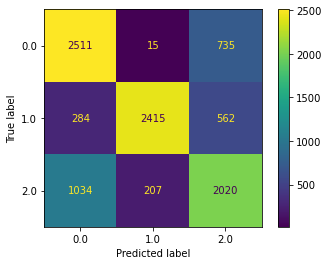

In [126]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(lg1,X_re, Y_re)
plt.show(pl)

In [127]:
### 2) Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 100,max_depth=16,max_features=10)
rf1.fit(X_re, Y_re)

RandomForestClassifier(max_depth=16, max_features=10)

In [131]:
print(rf1.score(X_re, Y_re))
print(rf1.score(X_test, Y_test))

0.8356332413370132
0.755939524838013


In [132]:
y_pred_train_rf1 = rf.predict(X_re)
acc_train_rf1 = accuracy_score(Y_re, y_pred_train_rf1)

y_pred_test_rf1 = rf.predict(X_test)
acc_test_rf1 = accuracy_score(Y_test, y_pred_test_rf1)
print(acc_train_rf1)
print(acc_test_rf1)

0.8352243688030256
0.7547396208303335


In [133]:
print(classification_report(Y_test, y_pred_test_rf1))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77      1389
         1.0       0.92      0.76      0.83      1410
         2.0       0.67      0.66      0.67      1368

    accuracy                           0.75      4167
   macro avg       0.77      0.75      0.76      4167
weighted avg       0.77      0.75      0.76      4167



In [134]:
y_pred_prob_rf1 = rf1.predict_proba(X_test)
roc_auc_score_rf1 = roc_auc_score(Y_test, y_pred_prob_rf1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_rf1)

ROC AUC Score: 0.8881318099335093


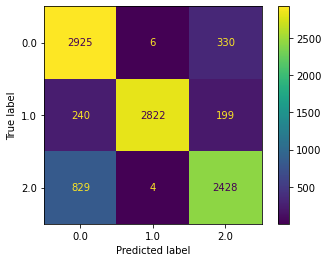

In [135]:
pl=plot_confusion_matrix(rf1,X_re, Y_re)
plt.show(pl)

In [136]:
print('Precision: %.3f' % precision_score(Y_test, y_pred_test_rf1,average="micro"))
print('Recall: %.3f' % recall_score(Y_test, y_pred_test_rf1,average="micro"))
print('F-measure: %.3f' % f1_score(Y_test, y_pred_test_rf1,average="micro"))

Precision: 0.755
Recall: 0.755
F-measure: 0.755


In [112]:
knn1 = KNeighborsClassifier(n_neighbors= 6 )
knn1.fit(X_re, Y_re)

KNeighborsClassifier(n_neighbors=6)

In [209]:
print(knn1.score(X_re, Y_re))
print(knn1.score(X_test, Y_test))

0.744659102524788
0.6801055915526758


In [114]:
y_pred_train_knn1 = knn1.predict(X_re)
acc_train_knn1 = accuracy_score(Y_re, y_pred_train_knn1)

y_pred_test_knn1 =knn1.predict(X_test)
acc_test_knn1 = accuracy_score(Y_test, y_pred_test_knn1)
print(acc_train_knn1)
print(acc_test_knn1)

0.744659102524788
0.6801055915526758


In [115]:
print(classification_report(Y_test, y_pred_test_knn1))

              precision    recall  f1-score   support

         0.0       0.59      0.92      0.72      1389
         1.0       0.94      0.66      0.78      1410
         2.0       0.62      0.45      0.53      1368

    accuracy                           0.68      4167
   macro avg       0.72      0.68      0.67      4167
weighted avg       0.72      0.68      0.67      4167



In [117]:
print('Precision: %.3f' % precision_score(Y_test, y_pred_test_knn1,average="micro"))
print('Recall: %.3f' % recall_score(Y_test, y_pred_test_knn1,average="micro"))
print('F-measure: %.3f' % f1_score(Y_test, y_pred_test_knn1,average="micro"))

Precision: 0.680
Recall: 0.680
F-measure: 0.680


In [137]:
y_pred_prob_knn1 = knn1.predict_proba(X_test)
roc_auc_score_knn1 = roc_auc_score(Y_test, y_pred_prob_knn1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_knn1)

ROC AUC Score: 0.8253434656839497


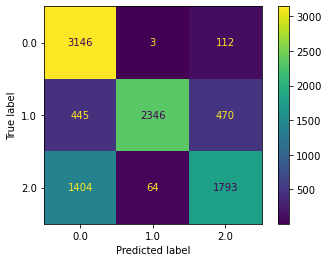

In [116]:
pl=plot_confusion_matrix(knn1,X_re, Y_re)
plt.show(pl)

In [138]:
dt1= DecisionTreeClassifier(max_features=10 , max_depth=16)
dt1.fit(X_re, Y_re)

DecisionTreeClassifier(max_depth=16, max_features=10)

In [139]:
print(dt1.score(X_re, Y_re))
print(dt1.score(X_test, Y_test))

0.798425840744148
0.7173026157907367


In [140]:
y_pred_train_dt1 = dt1.predict(X_re)
acc_train_dt1 = accuracy_score(Y_re, y_pred_train_dt1)

y_pred_test_dt1 =dt1.predict(X_test)
acc_test_dt1 = accuracy_score(Y_test, y_pred_test_dt1)
print(acc_train_dt1)
print(acc_test_dt1)

0.798425840744148
0.7173026157907367


In [141]:
print(classification_report(Y_test, y_pred_test_dt1))

              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74      1389
         1.0       0.88      0.74      0.80      1410
         2.0       0.63      0.59      0.61      1368

    accuracy                           0.72      4167
   macro avg       0.73      0.72      0.72      4167
weighted avg       0.73      0.72      0.72      4167



In [142]:
print('Precision: %.3f' % precision_score(Y_test, y_pred_test_dt1,average="micro"))
print('Recall: %.3f' % recall_score(Y_test, y_pred_test_dt1,average="micro"))
print('F-measure: %.3f' % f1_score(Y_test, y_pred_test_dt1,average="micro"))

Precision: 0.717
Recall: 0.717
F-measure: 0.717


In [143]:
y_pred_prob_dt1 = dt1.predict_proba(X_test)
roc_auc_score_dt1 = roc_auc_score(Y_test, y_pred_prob_dt1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_dt1)

ROC AUC Score: 0.825765318647373


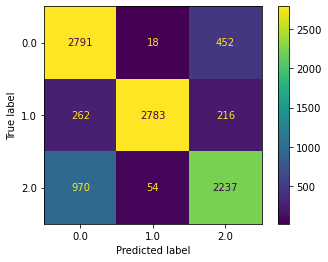

In [144]:
pl=plot_confusion_matrix(dt1,X_re, Y_re)
plt.show(pl)

In [146]:
xgb1= XGBClassifier(max_depth=10)
xgb1.fit(X_re, Y_re)

[19:01:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [148]:
print(xgb1.score(X_re, Y_re))
print(xgb1.score(X_test, Y_test))

0.8952264131656956
0.7700983921286297


In [149]:
y_pred_train_xgb1 = xgb1.predict(X_re)
acc_train_xgb1 = accuracy_score(Y_re, y_pred_train_xgb1)

y_pred_test_xgb1 =xgb1.predict(X_test)
acc_test_xgb1= accuracy_score(Y_test, y_pred_test_xgb1)
print(acc_train_xgb1)
print(acc_test_xgb1)

0.8952264131656956
0.7700983921286297


In [150]:
print(classification_report(Y_test, y_pred_test_xgb1))

              precision    recall  f1-score   support

         0.0       0.73      0.87      0.80      1389
         1.0       0.88      0.77      0.82      1410
         2.0       0.71      0.67      0.69      1368

    accuracy                           0.77      4167
   macro avg       0.78      0.77      0.77      4167
weighted avg       0.78      0.77      0.77      4167



In [152]:
print('Precision: %.3f' % precision_score(Y_test, y_pred_test_xgb1,average="micro"))
print('Recall: %.3f' % recall_score(Y_test, y_pred_test_xgb1,average="micro"))
print('F-measure: %.3f' % f1_score(Y_test, y_pred_test_xgb1,average="micro"))

Precision: 0.770
Recall: 0.770
F-measure: 0.770


In [153]:
y_pred_prob_xgb1 =xgb1.predict_proba(X_test)
roc_auc_score_xgb1 = roc_auc_score(Y_test, y_pred_prob_xgb1, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_xgb1)

ROC AUC Score: 0.886463537712327


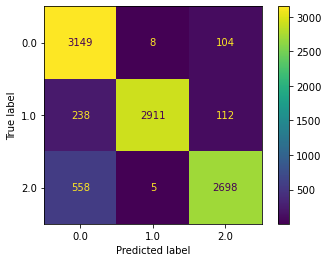

In [154]:
pl=plot_confusion_matrix(xgb1,X_re, Y_re)
plt.show(pl)

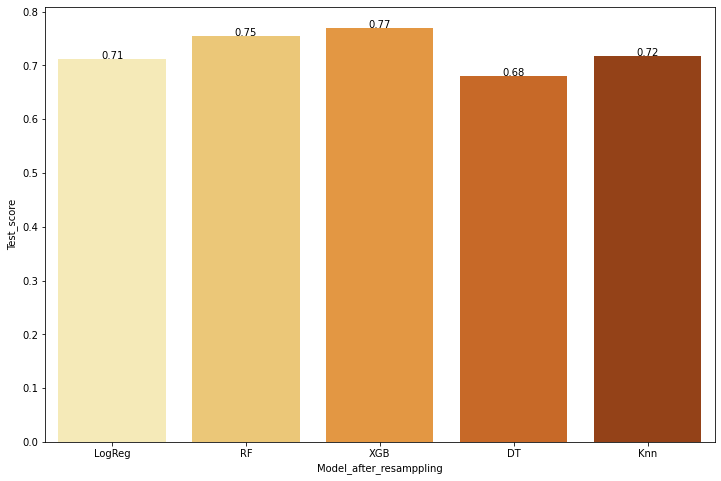

In [157]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['LogReg','RF','XGB','DT','Knn'],
        'Test_score': [accuracy_score(Y_test, y_pred_test_lg1),
                       accuracy_score(Y_test, y_pred_test_rf1),
                       accuracy_score(Y_test, y_pred_test_xgb1),
                       accuracy_score(Y_test, y_pred_test_knn1),
                      accuracy_score(Y_test, y_pred_test_dt1)],
        
        'ROC_AUC_Score': [roc_auc_score_lg1,
                          roc_auc_score_rf1, 
                          roc_auc_score_xgb1,
                          roc_auc_score_knn1,
                         roc_auc_score_dt1]
    }
)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_feature selection", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [159]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Test_score,ROC_AUC_Score
1,RF,0.754740,0.888132
2,XGB,0.770098,0.886464
0,LogReg,0.712263,0.860945
4,Knn,0.717303,0.825765
3,DT,0.680106,0.825343
